# Taller modelos lineales
# Juan Sebastián Ruiz Caro
# Yibby Daniela Gonzalez Forero

# Parte 1 - Regresión lineal

Estimar una regresión con los datos de ingresos


## Previsión de ingresos

Vamos a trabajar con un conjunto de datos del censo de EE.UU. indome ([diccionario de datos](https://archive.ics.uci.edu/ml/datasets/Adult))

A muchas empresas les gustaría personalizar su oferta en función de los ingresos del cliente. Los clientes con ingresos elevados podrían, por ejemplo, estar expuestos a productos premium. Como los ingresos de un cliente no siempre se conocen explícitamente, el modelo predictivo podría estimar los ingresos de una persona basándose en otra información.

Nuestro objetivo es crear un modelo predictivo que sea capaz de dar una estimación de los ingresos de una persona.


In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


## Ejercicio 4.1 

¿Cuál es la relación entre la edad y la renta?



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
from scipy import stats

In [3]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 35.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=bfd230a258810e86c9466b2b373b2581e3c59d3eae407e9d93d2c2b5f8eed06d
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=c1b59cb3fd604573d57298537a6f3634586d677074ad0afa994b1690d263abe9
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [4]:
import pingouin as pg

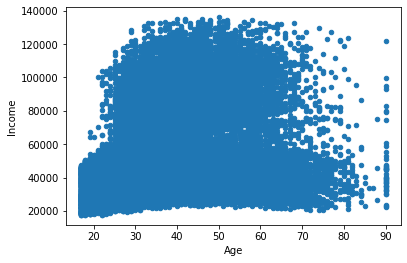

In [5]:
income.plot(x='Age', y='Income', kind='scatter')

Antes de analizar la relación de la renta y la edad, se grafica la distribución de probabilidad de ambas y se realiza la prueba de normalidad de Shapiro - Wilk con la finalidad de conocer cual es la mejor medida para cuantificar la correlación entre el par de variables.

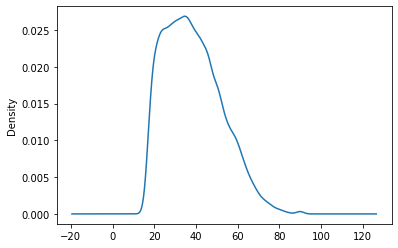

In [ ]:
income['Age'].plot.density()

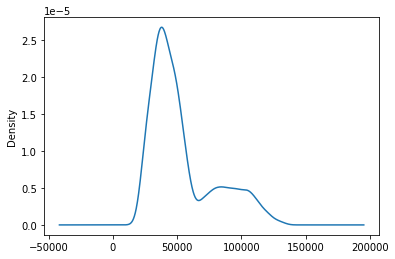

In [ ]:
income['Income'].plot.density()

In [ ]:
stats.shapiro(income['Age']).pvalue

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [ ]:
stats.shapiro(income['Income']).pvalue

0.0

Dado que los p-valores para cada una de las pruebas son cero, se rechaza la hipotesis nula en favor de que ni la edad ni los ingresos se distribuyen de manera normal, por lo tanto, para analizar la relación entre las variables, toman mas pesos los coefientes de correlación no parametricos de Spearman y Kendall, En este apartado se analizara principalmente el de Spearman.

In [ ]:
Pearson = income['Age'].corr(income['Income'], method = 'pearson')
Spearman = income['Age'].corr(income['Income'], method = 'spearman')
Kendall = income['Age'].corr(income['Income'], method = 'kendall')

In [ ]:
Correlaciones = pd.DataFrame()
Correlaciones['Método'] = ['Pearson' ,'Spearman', 'Kendall']
Correlaciones['Correlación'] = [Pearson, Spearman, Kendall]
Correlaciones

,Método,Correlación
0,Pearson,0.290408
1,Spearman,0.361352
2,Kendall,0.249463


En el grafico de dispersión se observa una aparente asociación lineal entre la renta y la edad, pese a que esta relación se ve alterada posiblemente porque en los datos parecen haber agrupaciones, el coefiente de correlación de Spearman arroja un valor de $0.361352$ lo cual indica que esta asociación es baja.

## Ejercicio 4.2
Para un aumento del uno por ciento en la edad, ¿cuánto aumenta la renta?
Utilizando sklearn estime una regresión lineal y prediga los ingresos cuando la Edad es de 30 y 40 años.

In [ ]:
from math import log
import math as ma

Text(0, 0.5, 'Ingresos')

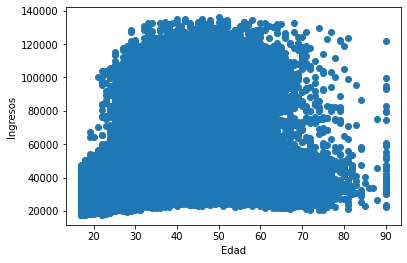

In [6]:
y = income['Income']
X = income['Age']
plt.scatter(X, y)
plt.xlabel('Edad')
plt.ylabel('Ingresos')

In [7]:
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]

from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept = False)
linreg.fit(X_, y)
Betas_skl = linreg.coef_

In [8]:
round(Betas_skl[1],2)

542.17

In [10]:
Betas_skl
x_ = np.array([[1, 30], [1, 40]]) ; x_

array([[ 1, 30],
       [ 1, 40]])

In [11]:
Betas_skl.dot(x_.T)
pred_30_skl = Betas_skl.dot(x_.T)[0]
pred_40_skl = Betas_skl.dot(x_.T)[1]
round(pred_30_skl, 3)

48803.118

In [12]:
round(pred_40_skl, 3)

54224.794

Se estima que los ingresos para edades de $30$ y $40$ años son, en promedio, $48803.118$ y $54224.794$ unidades monetarias respectivamente.



In [15]:
100 * (pred_40_skl - pred_30_skl)/pred_30_skl 

11.109283198178012


Se estima que, un aumento del $1$% en la edad, genera un aumento de los ingresos en promedio de $11.1092$% 



## Ejercicio 4.3

Ejecute un modelo de regresión utilizando como características la Edad y la Edad$^2$ utilizando las ecuaciones OLS. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.

Text(0, 0.5, 'Price')

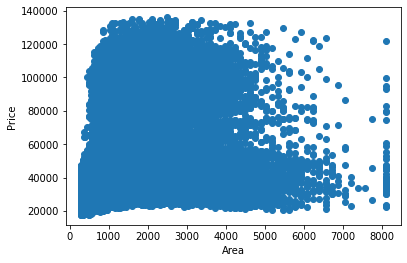

In [16]:
edad_2 = income['Age'] ** 2
plt.scatter(edad_2, income['Income'])
plt.xlabel('Area')
plt.ylabel('Price')

In [17]:
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), income['Age'], income['Age'] ** 2 ]

In [18]:
betas_OLS = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))

In [19]:
betas_OLS

array([-16225.07097408,   3131.77014151,    -30.54341041])

In [20]:
x_ = np.array([[1, 30, 30 ** 2], [1, 40, 40 ** 2]]) ; x_

array([[   1,   30,  900],
       [   1,   40, 1600]])

In [21]:
betas_OLS.dot(x_.T)

array([50238.96390027, 60176.27802692])

In [22]:
Est = pd.DataFrame()

In [23]:
Est['Sklearn'] = [pred_30_skl, pred_40_skl ]

In [24]:
Est['OLS'] = betas_OLS.dot(x_.T)

In [25]:
Est

,Sklearn,OLS
0,48803.117843,50238.963900
1,54224.794414,60176.278027


In [26]:
Real_30 = income['Income'][income['Age'] == 30].mean()
Real_40 = income['Income'][income['Age'] == 40].mean()

Se estima que los ingresos para edades de  30  y  40  años son, en promedio,  $50238.963900$  y  $60176.278027$  unidades monetarias respectivamente.

In [27]:
Est['Valor real'] = [Real_30, Real_40]

In [28]:
Est

,Sklearn,OLS,Valor real
0,48803.117843,50238.963900,49949.715447
1,54224.794414,60176.278027,60872.030227


In [29]:
RMSE_skl = (sum((Est['Valor real'] - Est['Sklearn']) ** 2) * (1/2)) ** (.5)
RMSE_OLS = (sum((Est['Valor real'] - Est['OLS']) ** 2) * (1/2)) ** (.5)

In [30]:
RMSE_skl , RMSE_OLS

(4769.718546127314, 532.7925445876606)

Tomando como criterio el $RMSE$, el modelo que mejor realiza predicciones del ingreso para edades de $30$ y $40$ años es el que estimo por medio de minimos cuadrados ordinarios usando como caracteristicas la variable edad sin modificaciones y esta variable al cuadrado.

## Ejercicio 4.4
Estime una regresión utilizando más características, diga cuáles y por qué las usó. Prediga de nuevo los ingresos cuando la Edad es de 30 y 40 años, y compare con el modelo anterior.


In [31]:
income_cua = income.loc[:,['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Income']]

In [32]:
income_cuali = income.loc[:,['Income','Workclass' , 'Education', 'Martial Status' , 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']]

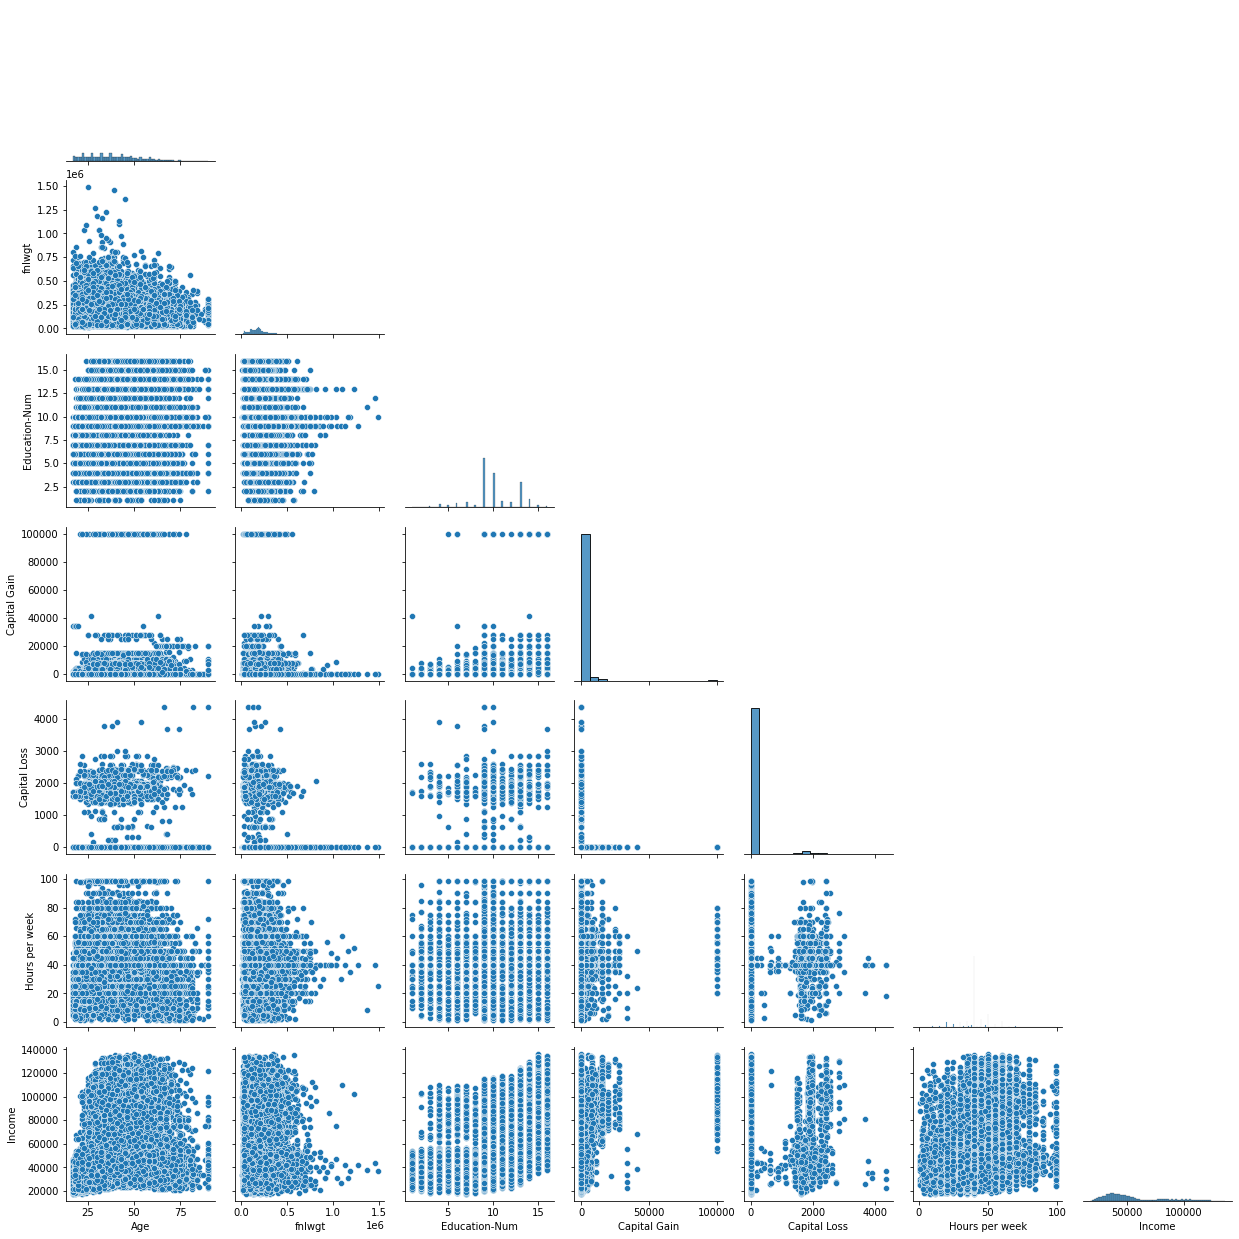

In [33]:
sns.pairplot(income_cua, diag_kind = 'hist', corner = True)

In [34]:
income_cua.corr()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.290408
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.014618
Education-Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.430757
Capital Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.214634
Capital Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.147597
Hours per week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.283949
Income,0.290408,-0.014618,0.430757,0.214634,0.147597,0.283949,1.000000


Previamente se realizaron modelos utilizando como caracteristicas la variable edad, esta presenta una correalación con el ingreso de $0.290408$, adicionalmente, se utilizarán para estimar un nuevo modelo la variable número de educación y horas por semana, dado que estas presentan una asociación positiva con la variable de interes, pese a que estas correalciones no sean altas y las relaciones no sean claras del todo de manera grafica, es lo que se puede rescatar en termino de las asociaciones.

In [35]:
income_cuali

,Income,Workclass,Education,Martial Status,Occupation,Relationship,Race,Sex,Country
0,51806.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,68719.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,51255.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,47398.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,30493.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...,...
32556,33618.0,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,87433.0,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,26801.0,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,44644.0,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


Para analizar las asociaciones de las variables cualitativas con el ingreso se procede a realizar el grafico de Box-Plot para observar como varia el comportamiento del ingreso apartir de las diferentes modalidades de las variables, posteriormente se realiza una prueba $ANOVA$ para constrastar que, en caso de que hallan diferencias en media, sean significativas, por lo tanto, se desea juzgar el siguiente sistema de hipotesis:

$$
\left\{
\begin{array}{ll}
H_{0}: &  \mu_1 = \mu_2 =\ldots=\mu_a \\
H_{1}: & \mu_i \neq \mu_j \thinspace \thinspace \forall_{i \neq j}
\end{array}
\right.
$$



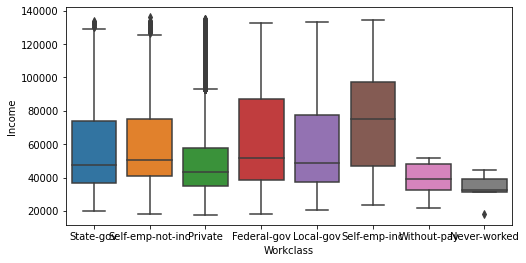

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Workclass', y= 'Income', data = income_cuali, ax=ax)

In [37]:
pg.anova(data = income_cuali, dv = 'Income', between = 'Workclass', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,Workclass,7.536827e+11,7,1.076690e+11,170.307365,2.523925e-248,0.037361
1,Within,1.941940e+13,30717,6.322037e+08,NaN,NaN,NaN


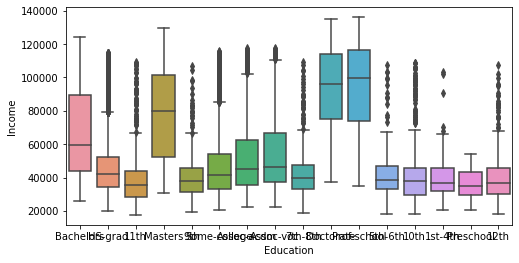

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Education', y="Income", data = income_cuali, ax=ax)

In [39]:
pg.anova(data = income_cuali, dv = 'Income', between = 'Education', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,Education,5.022611e+12,15,3.348407e+11,677.179228,0.0,0.23787
1,Within,1.609233e+13,32545,4.944639e+08,NaN,NaN,NaN


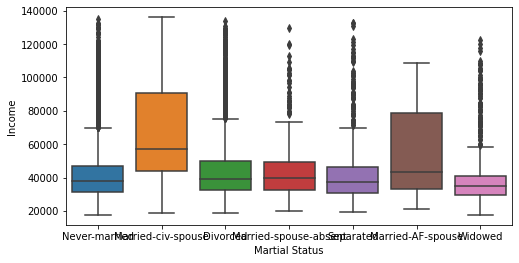

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Martial Status', y="Income", data = income_cuali, ax=ax)

In [41]:
pg.anova(data = income_cuali, dv = 'Income', between = 'Martial Status', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,Martial Status,5.265007e+12,6,8.775012e+11,1802.289884,0.0,0.24935
1,Within,1.584993e+13,32554,4.868813e+08,NaN,NaN,NaN


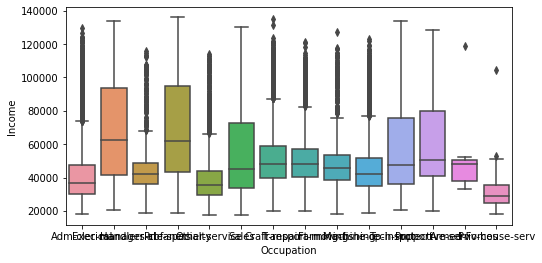

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Occupation', y="Income", data = income_cuali, ax=ax)

In [43]:
pg.anova(data = income_cuali, dv = 'Income', between = 'Occupation', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,Occupation,3.330872e+12,13,2.562209e+11,467.192239,0.0,0.165142
1,Within,1.683891e+13,30704,5.484271e+08,NaN,NaN,NaN


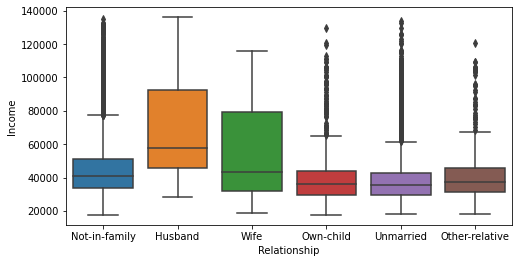

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Relationship', y="Income", data = income_cuali, ax=ax)

In [45]:
pg.anova(data = income_cuali, dv = 'Income', between = 'Relationship', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,Relationship,5.789475e+12,5,1.157895e+12,2459.649263,0.0,0.274189
1,Within,1.532547e+13,32555,4.707561e+08,NaN,NaN,NaN


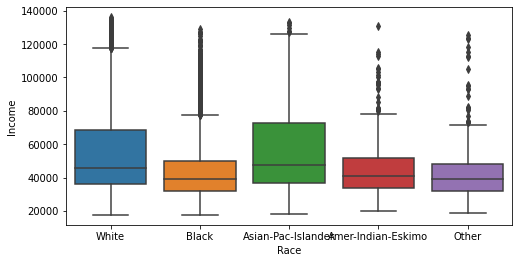

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = "Race", y = "Income", data = income_cuali, ax=ax)

In [47]:
pg.anova(data = income_cuali, dv = 'Income', between = 'Race', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,Race,3.134662e+11,4,7.836656e+10,122.650051,4.438462e-104,0.014846
1,Within,2.080147e+13,32556,6.389444e+08,NaN,NaN,NaN


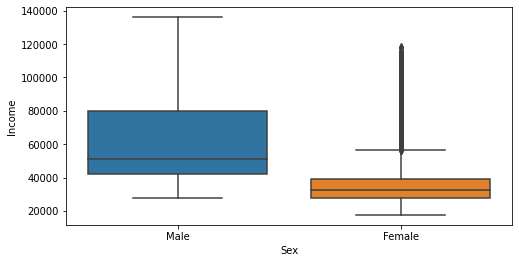

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = "Sex", y="Income", data = income_cuali, ax=ax)

In [49]:
pg.anova(data = income_cuali, dv = 'Income', between = 'Sex', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,Sex,3.998129e+12,1,3.998129e+12,7605.100959,0.0,0.189351
1,Within,1.711681e+13,32559,5.257167e+08,NaN,NaN,NaN


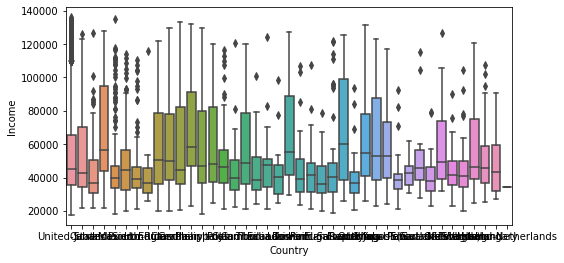

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = "Country", y= "Income", data = income_cuali, ax=ax)

In [51]:
pg.anova(data = income_cuali, dv = 'Income', between = 'Country', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,Country,2.513470e+11,40,6.283675e+09,9.81548,4.928406e-59,0.012144
1,Within,2.044543e+13,31937,6.401802e+08,NaN,NaN,NaN


Para un nivel de significancia del $5$%, dado que los p-valores para cada una de las pruebas ANOVA realizadas son menores a este valor, se rechaza la hipotesis nula en favor de que existe almenos dos modalidades dentro de una variable cualitativa para la cual se presenta un cambio en media del ingreso, es decir, todas las variables cualitativas que tiene la base de datos estan relacionadas de alguna manera con el ingreso.

Dado que, para incluir estas variables como caracteristicas para el modelo de regresión lineal, es necesario, para una variable con $a$ modalidades, crear $a-1$ variables dummy's adicionales para poder introducir en el analisis toda la variable, por parsimonia, se incluira en el modelo unicamente las variables sexo y estado civil adicionalmente a las variables cuantitativas seleccionadas previamente.

In [52]:
Sex_dummy = pd.get_dummies(income['Sex'])
Relationship_dummy = pd.get_dummies(income['Relationship'])

In [53]:
Sex_dummy = Sex_dummy.loc[:,['Male']] ; # Femenino categoria de referencia 
Relationship_dummy = Relationship_dummy.loc[:,['Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']] # Casados

In [54]:
X_ = np.c_[np.ones(n_samples), income.loc[:,['Age', 'Education-Num']], Sex_dummy, Relationship_dummy]

In [55]:
linreg = LinearRegression(fit_intercept = False)
linreg.fit(X_, y)
Betas_comp = linreg.coef_

In [56]:
Betas_comp

array([  -967.03356975,    284.04900619,   3906.21654979,  17039.93195584,
       -13524.89434226, -12348.970033  , -15185.83484187, -12726.33557292,
         4473.25331616])

In [57]:
x_

array([[   1,   30,  900],
       [   1,   40, 1600]])

In [58]:
x_ = np.array([[1, 30, 9, 0, 0, 0, 0, 0, 0 ], [1, 40, 9, 0, 0, 0, 0, 0, 0]]) ; x_
Betas_comp.dot(x_.T)
pred_30_comp = Betas_comp.dot(x_.T)[0]
pred_40_comp = Betas_comp.dot(x_.T)[1]

In [59]:
pred_30_comp, pred_40_comp
round(pred_30_comp, 2) , round(pred_40_comp, 2) 

(42710.39, 45550.88)

Para dos individuos que sean mujeres, casadas, con número de educación nueve, se estima que los ingresos de estas si una tiene 30 y la otra 40 años son, en promedio, $42710.39$  y  $45550.88$  unidades monetarias respectivamente.

In [60]:
Est['Completo'] = [pred_30_comp, pred_40_comp]

In [61]:
Est

,Sklearn,OLS,Valor real,Completo
0,48803.117843,50238.963900,49949.715447,42710.385564
1,54224.794414,60176.278027,60872.030227,45550.875626


In [62]:
RMSE_Completo = (sum((Est['Valor real'] - Est['Completo']) ** 2) * (1/2)) ** (.5)

In [63]:
RMSE_skl, RMSE_OLS, RMSE_Completo

(4769.718546127314, 532.7925445876606, 11982.188352988602)

Tomando como criterio el $RMSE$, el modelo que mejor realiza predicciones del ingreso para edades de $30$ y $40$ años es el que estimo por medio de minimos cuadrados ordinarios usando como caracteristicas la variable edad sin modificaciones y esta variable al cuadrado. Seguido del modelo estimado por medio de Sklearn que utiliza como caracteristica unicamente la edad, por ultimo, el modelo que realiza las peores predicciones en el estimado en este apartado.

## Ejercicio 4.5

Utilizando las características seleccionadas en el punto anterior, parta la base en training (90%) y validación (10%). Posterior, con la bases de training (90%) aplique un modelo de regresión lineal usando K fold cross validation:
* K = 2
* K = 5
* K = 10

Calcule el MSE de test y el MSE de validación (10% restante) y compare los modelos.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [65]:
X_ = np.c_[np.ones(n_samples), income.loc[:,['Age', 'Education-Num']], Sex_dummy, Relationship_dummy]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.1, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29304, 9) (3257, 9) (29304,) (3257,)


In [67]:
mod = LinearRegression()
mod.fit(X_train, y_train)

LinearRegression()

In [68]:
cv = KFold(n_splits = 2, random_state=69, shuffle=True)
scores = cross_val_score(mod, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
abs(np.mean(scores))

331024703.83724296

In [69]:
scores = cross_val_score(mod, X_test, y_test, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
abs(np.mean(scores))

343434434.0259329

In [70]:
cv = KFold(n_splits = 5, random_state=69, shuffle=True)
scores = cross_val_score(mod, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
abs(np.mean(scores))

330902160.071239

In [71]:
scores = cross_val_score(mod, X_test, y_test, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
abs(np.mean(scores))

343676145.4963864

In [72]:
cv = KFold(n_splits = 10, random_state=69, shuffle=True)
scores = cross_val_score(mod, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
abs(np.mean(scores))

330904421.98319185

In [73]:
scores = cross_val_score(mod, X_test, y_test, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
abs(np.mean(scores))

343566758.7481618

In [74]:
Cuadro = pd.DataFrame()

In [75]:
Cuadro['K'] = [2, 5, 10]

In [76]:
Cuadro['MSE Train'] = [331024703.837243, 330902160.071239, 330904421.9831917 ]
Cuadro['MSE Test'] = [343434434.0259328, 343676145.4963864, 343566758.7481617 ]

In [77]:
Cuadro

,K,MSE Train,MSE Test
0,2,3.310247e+08,3.434344e+08
1,5,3.309022e+08,3.436761e+08
2,10,3.309044e+08,3.435668e+08


En el cuadro, podemos observar que independientemente del número de grupos con el cual se hizo el K-Fols Cross Validation, el $MSE$ de los datos de entrenamiento es similar en los datos de testeo, lo cual quiere decir que el modelo esta aprendiendo de los datos de tal forma que, es posible su generalización, por otra parte, cuando se realizo la validación cruzada con $k=5$ se obtuvo el menor $MSE$ intramuestra, mientras que, cuando se realizo con $k=2$ se tiene el menor $MSE$ por fuera de la muestra.

#Parte 2: Regresión Logística

### Customer Churn: 
La pérdida/abandono de los clientes de la empresa. Especialmente, las industrias que la adquisición de usuarios es costosa, es de crucial importancia para una empresa para reducir e idealmente hacer que la rotación de clientes a 0 para mantener sus ingresos recurrentes. Si se considera que la retención de clientes es siempre más barata que la adquisición de clientes y generalmente depende de los datos del usuario (uso del servicio o producto), plantea un gran/excitante/difícil problema para el aprendizaje automático.

### Datos
El conjunto de datos procede de un proveedor de servicios de telecomunicaciones en el que se recoge el uso del servicio (plan internacional, plan de buzón de voz, uso diurno, uso nocturno, etc.) y la información demográfica básica (estado y código de área) del usuario. En el caso de las etiquetas, tengo un único punto de datos que indica si el cliente ha sido dado de baja o no.


In [ ]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [ ]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Ejercicio 4.6

¿Cuál es la distribución de los churners? Haga la transformación correspondiente para predecir Churn. (0-FAlse, 1-True)



In [ ]:
!pip install dfply
from dfply import *


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data2 = data['Churn?']
data2[data2== 'False.'] = 0
data2[data2== 'True.']  = 1

data['Churn?'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


483

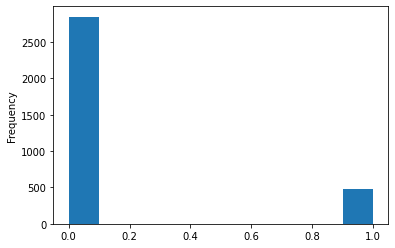

In [ ]:
data['Churn?'].plot.hist()

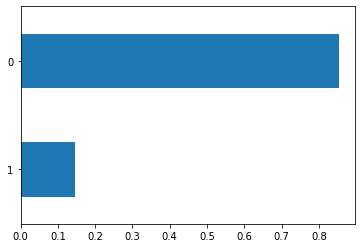

In [ ]:
data['Churn?'].value_counts(ascending=True,normalize=True).tail(20).plot.barh()

# Ejercicio 4.7
Entrene una Regresión Logística creando Y y X con la información en IntlCharge.


In [ ]:
data['Churn'] = data['Churn?']
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,13.57,139.2,137,6.26,5.0,10,1.35,2,0,0


In [ ]:
# Crear variables para el modelo
y = data['Churn'].values
X = data['Intl Charge'].values

Text(0, 0.5, 'Churn')

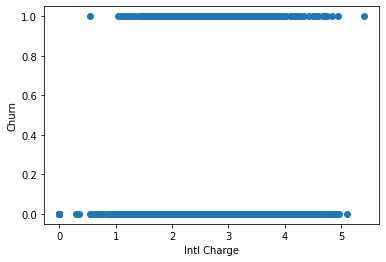

In [ ]:
plt.scatter(X, y)
plt.xlabel('Intl Charge')
plt.ylabel('Churn')

In [ ]:
# Modelo 
from sklearn.linear_model import LogisticRegression
Log1 = LogisticRegression(solver = "liblinear")
X = X.reshape(-1,1)
y = y.astype('int')
Log1.fit(X, y)
data['Churn_pred'] = Log1.predict(X)
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Churn,Churn_pred
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,0,0,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,0,0,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,279.1,83,12.56,9.9,6,2.67,2,0,0,0
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,191.3,123,8.61,9.6,4,2.59,3,0,0,0
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,191.9,91,8.64,14.1,6,3.81,2,0,0,0
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,139.2,137,6.26,5.0,10,1.35,2,0,0,0


In [ ]:
data['Churn_pred'].value_counts()

0    3333
Name: Churn_pred, dtype: int64

In [ ]:
from pandas.core import describe
data['Intl Charge'].describe()

count    3333.000000
mean        2.764581
std         0.753773
min         0.000000
25%         2.300000
50%         2.780000
75%         3.270000
max         5.400000
Name: Intl Charge, dtype: float64

# Ejercicio 4.8

¿Cuáles son los coeficientes de la regresión logística? Interpretelos para un valor de IntlCharge = 1.




In [ ]:
# coeficientes de la regresión  
print('B0 =',Log1.intercept_, 'y B1 =',Log1.coef_[0],)

B0 = [-2.41788052] y B1 = [0.2308027]


In [ ]:
# IntlCharge = 1
Log1odds = Log1.intercept_ + Log1.coef_[0] * 1
Log1odds

array([-2.18707782])

# Ejercicio 4.9

Seleccione 3 variables independientes para entrenar una regresión logística. Interprete cada uno de los valores de los coeficientes en función de la variable churn.


In [ ]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?', 'Churn'],
      dtype='object')

In [ ]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn_pred
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.0
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.0
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.0
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.0
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.0
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.0
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.0
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,0.0


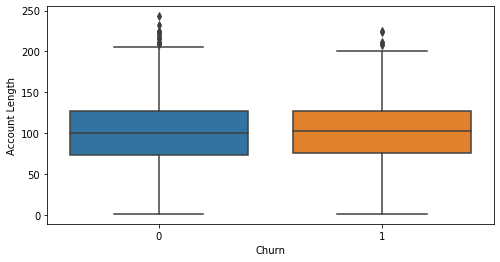

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Churn', y= 'Account Length', data = data, ax=ax)

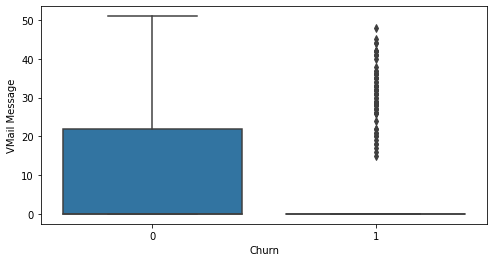

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Churn', y= 'VMail Message', data = data, ax=ax)

In [ ]:
pg.anova(data = data, dv = 'VMail Message', between = 'Churn', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,Churn,5026.478785,1,5026.478785,27.035912,2.117522e-07,0.008051
1,Within,619294.847948,3331,185.918597,NaN,NaN,NaN


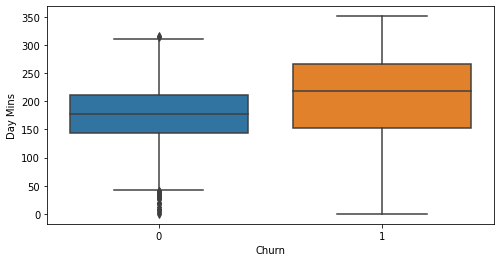

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Churn', y= 'Day Mins', data = data, ax=ax)

In [ ]:
pg.anova(data = data, dv = 'Day Mins', between = 'Churn', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,Churn,4.160300e+05,1,416030.014200,146.350785,5.300278e-33,0.042087
1,Within,9.469003e+06,3331,2842.690687,NaN,NaN,NaN


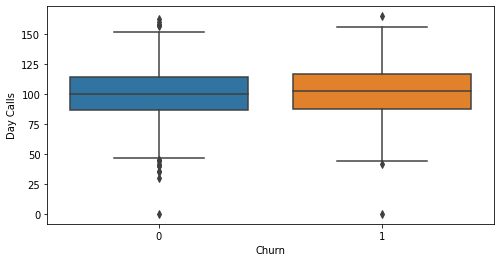

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Churn', y= 'Day Calls', data = data, ax=ax)

In [ ]:
pg.anova(data = data, dv = 'Day Calls', between = 'Churn', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,Churn,4.572894e+02,1,457.289369,1.135412,0.286701,0.000341
1,Within,1.341566e+06,3331,402.751773,NaN,NaN,NaN


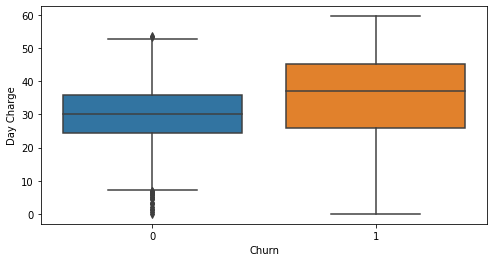

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Churn', y= 'Day Charge', data = data, ax=ax)

In [ ]:
pg.anova(data = data, dv = 'Day Charge', between = 'Churn', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,Churn,12023.201198,1,12023.201198,146.350657,5.300606e-33,0.042087
1,Within,273652.910160,3331,82.153380,NaN,NaN,NaN


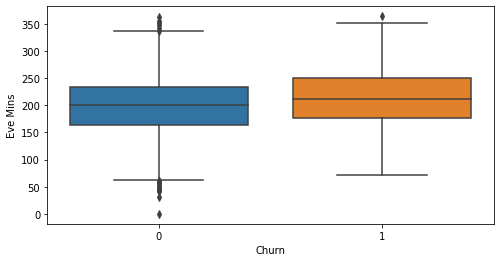

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Churn', y= 'Eve Mins', data = data, ax=ax)

In [ ]:
pg.anova(data = data, dv = 'Eve Mins', between = 'Churn', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,Churn,7.379291e+04,1,73792.905510,28.932577,8.011339e-08,0.008611
1,Within,8.495758e+06,3331,2550.512746,NaN,NaN,NaN


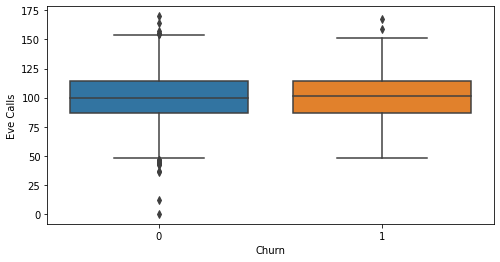

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Churn', y= 'Eve Calls', data = data, ax=ax)

In [ ]:
pg.anova(data = data, dv = 'Eve Calls', between = 'Churn', detailed = True )

,Source,SS,DF,MS,F,p-unc,np2
0,Churn,1.127447e+02,1,112.744719,0.283994,0.594131,0.000085
1,Within,1.322395e+06,3331,396.996308,NaN,NaN,NaN


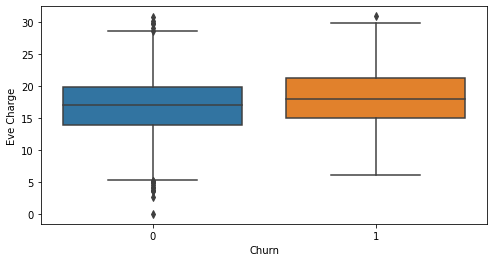

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Churn', y= 'Eve Charge', data = data, ax=ax)

In [ ]:
pg.anova(data = data, dv = 'Eve Charge', between = 'Churn', detailed = True)

,Source,SS,DF,MS,F,p-unc,np2
0,Churn,533.039443,1,533.039443,28.926444,8.036524e-08,0.008609
1,Within,61381.703181,3331,18.427410,NaN,NaN,NaN


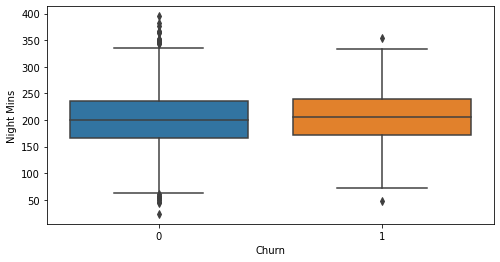

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Churn', y= 'Night Mins', data = data, ax=ax)

In [ ]:
pg.anova(data = data, dv = 'Night Mins', between = 'Churn', detailed = True)

,Source,SS,DF,MS,F,p-unc,np2
0,Churn,1.073591e+04,1,10735.908582,4.201496,0.040466,0.00126
1,Within,8.511567e+06,3331,2555.258825,NaN,NaN,NaN


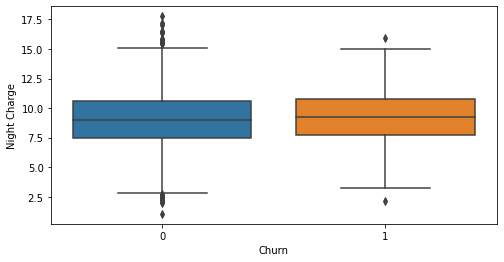

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Churn', y= 'Night Charge', data = data, ax=ax)

In [ ]:
pg.anova(data = data, dv = 'Night Charge', between = 'Churn', detailed = True)

,Source,SS,DF,MS,F,p-unc,np2
0,Churn,21.744476,1,21.744476,4.202136,0.040451,0.00126
1,Within,17236.673305,3331,5.174624,NaN,NaN,NaN


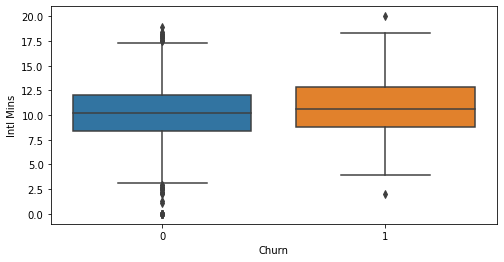

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Churn', y= 'Intl Mins', data = data, ax=ax)

In [ ]:
pg.anova(data = data, dv = 'Intl Mins', between = 'Churn', detailed = True)

,Source,SS,DF,MS,F,p-unc,np2
0,Churn,120.933982,1,120.933982,15.583468,0.000081,0.004657
1,Within,25849.900407,3331,7.760402,NaN,NaN,NaN


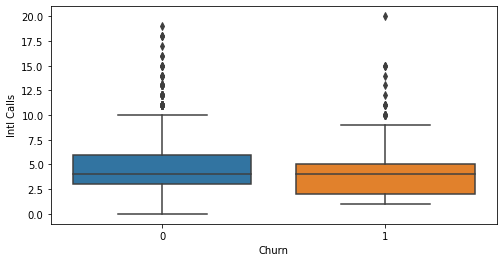

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Churn', y= 'Intl Calls', data = data, ax=ax)

In [ ]:
pg.anova(data = data, dv = 'Intl Calls', between = 'Churn', detailed = True)

,Source,SS,DF,MS,F,p-unc,np2
0,Churn,56.363860,1,56.363860,9.327945,0.002275,0.002793
1,Within,20127.478324,3331,6.042473,NaN,NaN,NaN


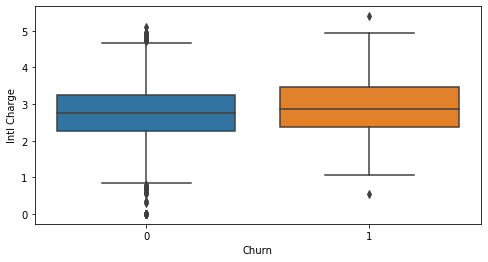

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Churn', y= 'Intl Charge', data = data, ax=ax)

In [ ]:
pg.anova(data = data, dv = 'Intl Charge', between = 'Churn', detailed = True)

,Source,SS,DF,MS,F,p-unc,np2
0,Churn,8.820655,1,8.820655,15.592581,0.00008,0.004659
1,Within,1884.332286,3331,0.565696,NaN,NaN,NaN


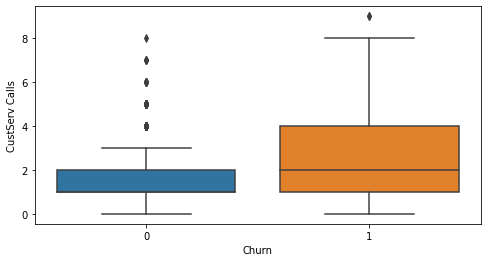

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x = 'Churn', y= 'CustServ Calls', data = data, ax=ax)

In [ ]:
pg.anova(data = data, dv = 'CustServ Calls', between = 'Churn', detailed = True)

,Source,SS,DF,MS,F,p-unc,np2
0,Churn,251.266013,1,251.266013,151.767013,3.900360e-34,0.043577
1,Within,5514.815596,3331,1.655604,NaN,NaN,NaN


## Ejercicio 4.10

Utilizando las 3 variables independientes del punto anterior, particione la base en training (90%) y validación (10%). Posterior, con la bases de training (90%) aplique un modelo de regresión logística usando K fold cross validation:
* K = 2
* K = 5
* K = 10

Calcule la precisión de test y la precisión de validación(10% restante) y compare los modelos.

In [ ]:
# Separar entre entrenamiento y test
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2233,) (1100,) (2233,) (1100,)
